# Wongsaton Netpuggana 6030820921

# Import library Pandas , Numpy  and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Data

In [2]:
data = pd.read_excel('https://github.com/Maplub/fire_msc/blob/master/Fire_Data.xlsx?raw=true')

In [3]:
data.head()

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0


# เลือก ข้อมูล 7 วัน

In [4]:
data = data[data['ACQ_DATE'] < '2019-12-08']

In [5]:
data.head()

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0


# แปลง date เป็น day

In [6]:
data[['DAY']]=(data['ACQ_DATE'] - data['ACQ_DATE'][0]).dt.days+1

In [7]:
data['DAY']

0      1
1      1
2      1
3      1
4      1
      ..
712    7
713    7
714    7
715    7
716    7
Name: DAY, Length: 717, dtype: int64

In [77]:
timenew = (data['ACQ_TIME']/100).apply(str).str.split(".",expand=True)
timenew.head()

,0,1
0,6,35
1,6,35
2,6,35
3,6,35
4,6,35


# แปลง time เป็นหน่วย day

In [166]:
data['time']= (timenew[0].astype(float)/24+(timenew[1].astype(float))/(60*24))

In [167]:
data['time']

0      0.274306
1      0.274306
2      0.274306
3      0.274306
4      0.274306
         ...   
712    0.787500
713    0.787500
714    0.787500
715    0.787500
716    0.787500
Name: time, Length: 717, dtype: float64

In [168]:
data['DAY_TIME']=data['DAY']+data['time']

In [169]:
data['DAY_TIME']

0      1.274306
1      1.274306
2      1.274306
3      1.274306
4      1.274306
         ...   
712    7.787500
713    7.787500
714    7.787500
715    7.787500
716    7.787500
Name: DAY_TIME, Length: 717, dtype: float64

# plot ข้อมูล เป็น 3d

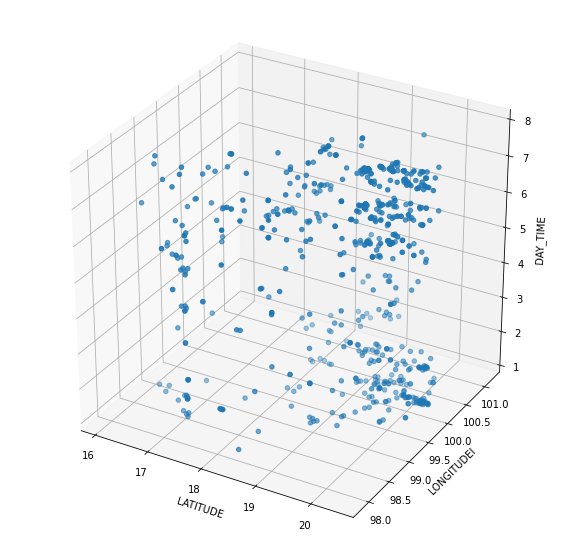

In [170]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x =data[['LATITUDE']]
y =data[['LONGITUDE']]
z =data[['DAY_TIME']]



ax.scatter(x, y, z)

ax.set_xlabel('LATITUDE')
ax.set_ylabel('LONGITUDEl')
ax.set_zlabel('DAY_TIME')

plt.show()

# Import library sklearn , KMeans  and silhouette

In [171]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# เก็บข้อมูล Lat Lon ไว้ใน Points แล้วแปลงเป็น array

In [172]:
points =data[['LATITUDE','LATITUDE']].to_numpy()
points

array([[16.33696, 16.33696],
       [16.48906, 16.48906],
       [16.93571, 16.93571],
       ...,
       [16.40887, 16.40887],
       [18.47282, 18.47282],
       [18.69487, 18.69487]])

# หาว่าการแบ่งกลุ่มว่าจะได้ silhouette avg เท่าไร
เริ่มจาก 2 กลุ่ม ถึง 10 กลุ่ม
ถ้า silhouette avg ใกล้1แสดงว่าดีสุด

In [173]:
n_clusters=10

In [174]:
silhouette_avg_n_clusters=[];
for i in range(2, n_clusters+1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(points)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(points, cluster_labels)
    silhouette_avg_n_clusters.append([i,silhouette_avg])

# พบว่าแบ่งเป็น 2 กลุ่ม  silhouette avg ดีสุด

In [175]:
silhouette_avg_n_clusters

[[2, 0.659286296806387],
 [3, 0.6476209082465191],
 [4, 0.6551789968280745],
 [5, 0.6258417717856214],
 [6, 0.6305233621390305],
 [7, 0.6191061900575056],
 [8, 0.6323353372865552],
 [9, 0.6354715648022665],
 [10, 0.5911755120694551]]

# plot ข้อมูล เป็น 3d โดยแบ่ง 2กลุ่ม

In [176]:
n_clusters=2

In [177]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data[['LATITUDE']], data[['LONGITUDE']])
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(points, cluster_labels)
silhouette_avg_n_clusters.append([i+1,silhouette_avg])

# sum of squared distances

In [178]:
cluster_labels = kmeans.labels_
SS = kmeans.inertia_ #Sum of squared distances of samples to their closest cluster center.

In [179]:
SS

190.7738416587578

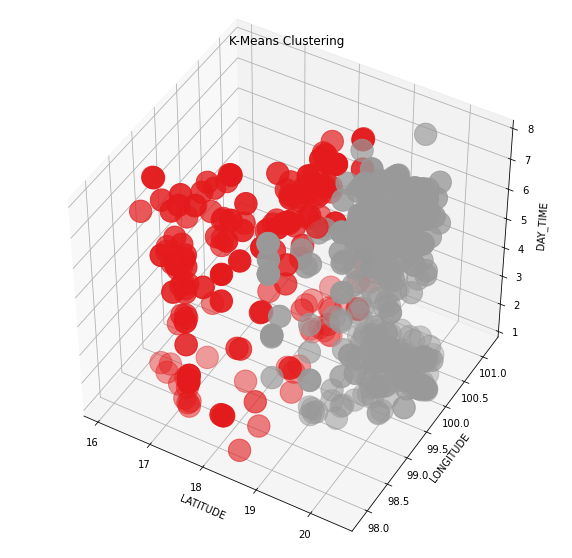

In [180]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x =data[['LATITUDE']]
y =data[['LONGITUDE']]
z =data[['DAY_TIME']]



ax.scatter(x, y, z,c=cluster_labels, cmap='Set1',s=500)
ax.view_init(elev=45)
ax.set_xlabel('LATITUDE')
ax.set_ylabel('LONGITUDE')

ax.set_zlabel('DAY_TIME')
ax.set_title('K-Means Clustering')
plt.show()

# แสดง silhouette ในแต่ละกลุ่มที่แบ่ง

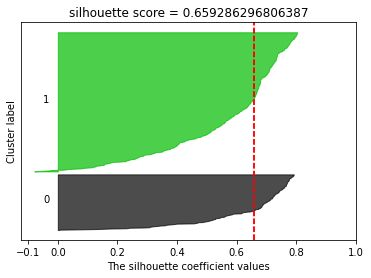

In [181]:
import matplotlib.cm as cm
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
          0, ith_cluster_silhouette_values,
          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("silhouette score = " + str(silhouette_avg))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])